# 04. Классы в Haskell

<div style="text-align: right"> 
    
    Лекция 4.1 26/02/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## **Классы в Haskell**

Новое понятие - *класс*. Тип может принадлежать определённому классу - для этого типа разрешены те или иные функции.

Класс *определяет набор функций*. Тип данных принадлежит некоторому классу, если для него определены все функции, объявленные в классе.

В определении класса может быть встречаться параметр `тип` (`t`).

In [1]:
class Eq t where
    (==), (/=) :: t -> t -> Bool

В классе `Eq` есть две функции - `==` и `/=`, возвращающие значение True или False

Мы объявляем, что некоторый тип данных принадлежит этому классу, с помощью определения «экземпляра» класса.

По существу это реализация операций - для данного типа есть реализация всех функций класса.

Если бы объявляли **экземпляр класса** типа `Bool`, то мы могли бы написать следующее определение

In [2]:
instance Eq Bool where
    True  == True    = True
    False == False   = True
    _     == _       = False
    x     /= y       = not (x == y)

Можно перенести уравнение 

```haskell 
x     /= y       = not (x == y)
```

в класс - тогда оно будет считаться общим для всех экземпляров класса.

In [3]:
class Eq t where
    (==), (/=) :: t -> t -> Bool
    x     /= y       = not (x == y)

Line 3: Use /=
Found:
not (x == y)
Why not:
x /= y

Рассмотрим ещё один экземпляр. Мы считаем, что если у нас есть тип `t` уже принадлежит классу `Eq`, то тогда мы создаём экземпляр класса `[t]` - список из элементов `t`.

```haskell

instance (Eq t) => Eq [t] where
    []      == []       = True -- два пустых списка
    (x1:s1) == (x2:s2)  = (x1 == x2) && (s1 == s2) -- равенство головы списков и рекурсивное определение
    _       == _        = False
```

In [4]:
:info Eq -- можно посмотреть информацию о классе

## **Пример: определение операций сравнения над деревьями**

In [5]:
data Tree a = Empty |
              Node (Tree a) a (Tree a)

instance (Eq t) => Eq (Tree t) where
    Empty              ==  Empty              = True
    (Node tl1 n1 tr1)  ==  (Node tl2 n2 tr2)  =  
                                (n1 == n2) && (tl1 == tl2) && (tr1 == tr2)
    _ == _ = False

In [6]:
instance (Eq t) => Eq (Tree t) where
    Empty              ==  Empty              = True
    (Node tl1 n1 tr1)  ==  (Node tl2 n2 tr2)  =  
                   (n1 == n2) && (((tl1 == tl2) && (tr1 == tr2)) ||
                                  ((tl1 == tr2) && (tr1 == tl2)))
    _ == _ = False


In [7]:
t1 = Node (Node Empty 2 Empty) 1 
          (Node (Node Empty 4 Empty) 3 
                (Node Empty 5 Empty))
t2 = Node (Node (Node Empty 5 Empty) 3 
                (Node Empty 4 Empty)) 1
          (Node Empty 2 Empty)


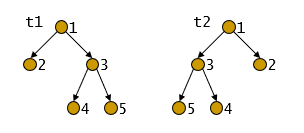

1. По первому определению деревья *не равны*
2. По второму определению деревья *равны*

## **Вывод значений различных типов в виде строки:: `Show`**

Немного упрощенная версия класса для вывода значений в виде строки:

In [8]:
class Show t where
    show       ::  t -> String
    showsPrec  ::  Int -> t -> String -> String
    show v           =   showsPrec 0 v []
    showsPrec _ v s  =   show v ++ s

Line 4: Use shows
Found:
showsPrec 0
Why not:
shows

In [11]:
shows :: (Show a) => a -> String -> String 
shows  =  showsPrec 0

- `showsPrec` - можете решить, показывать ли это значение с помощью парнеров вокруг него или нет - можно задавать, когда строковое представление может быть разным.

In [13]:
instance (Show t) => Show (Tree t) where
    showsPrec _ Empty        =  id
    showsPrec _ (Node tl n tr)  =
                 ('(':) . (shows tl) . (shows n) . (shows tr) . (')':)

Line 4: Redundant bracket
Found:
(shows tl) . (shows n) . (shows tr) . (')' :)
Why not:
shows tl . (shows n) . (shows tr) . (')' :)Line 4: Redundant bracket
Found:
(shows n) . (shows tr) . (')' :)
Why not:
shows n . (shows tr) . (')' :)Line 4: Redundant bracket
Found:
(shows tr) . (')' :)
Why not:
shows tr . (')' :)

## Расширение классов

Могу написать класс `Ord` написав ограничения для класса - это называется **расширением класса** -- класс, содержаший функции `==` и `/=`. В минимальном определении должны содержаться либо `compare`, либо `==`.

In [15]:
class (Eq t) => Ord t where
    (<), (<=), (>), (>=) :: t -> t -> Bool
    a <  b = not (a >= b)
    a <= b = not (a >  b)
    a >  b = not (a <= b)
    a >= b = not (a <  b)

Line 3: Use <
Found:
not (a >= b)
Why not:
a < bLine 4: Use <=
Found:
not (a > b)
Why not:
a <= bLine 5: Use >
Found:
not (a <= b)
Why not:
a > bLine 6: Use >=
Found:
not (a < b)
Why not:
a >= b

In [16]:
instance (Ord t) => Ord (Tree t) where
    Empty <= _ = True
    (Node tl1 n1 tr1) <= (Node tl2 n2 tr2) =
                         (tl1 <= tl2) && (n1 <= n2) && (tr1 <= tr2)
    _ <= _ = False
    t1 < t2 = (t1 <= t2) && (t1 /= t2)


Это «плохое» определение операций сравнения.
Так определенные операции не обладают обычными свойствами для операций сравнения.

Если мы записываем стандартные определения класса, то мы можем перечислить в `deriving` классы, для которых хотим сделать стандартные определения сравнения.

```haskell
data Tree a = Empty |
              Node (Tree a) a (Tree a)
                 deriving (Eq, Ord, Show)
```

- объекты равны, если равны все составляющие их части!
- сравнение происходит в лексикографическом порядке составляющих объекты: конструкторов: `Empty < (Node t1 n t2)` для любых `t1`, `n` и `t2`

- преобразование в строку: выводятся имена конструкторов и их аргументы